In [ ]:
import numpy as np
from pylab import show
from math import sqrt
from scipy.stats import norm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np
from scipy.integrate import odeint   # odeint : EDO NUMERICO
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from ipywidgets import *
from pylab import *
from matplotlib import animation
import math as mt
import numpy as np
import imageio
from scipy.stats import norm

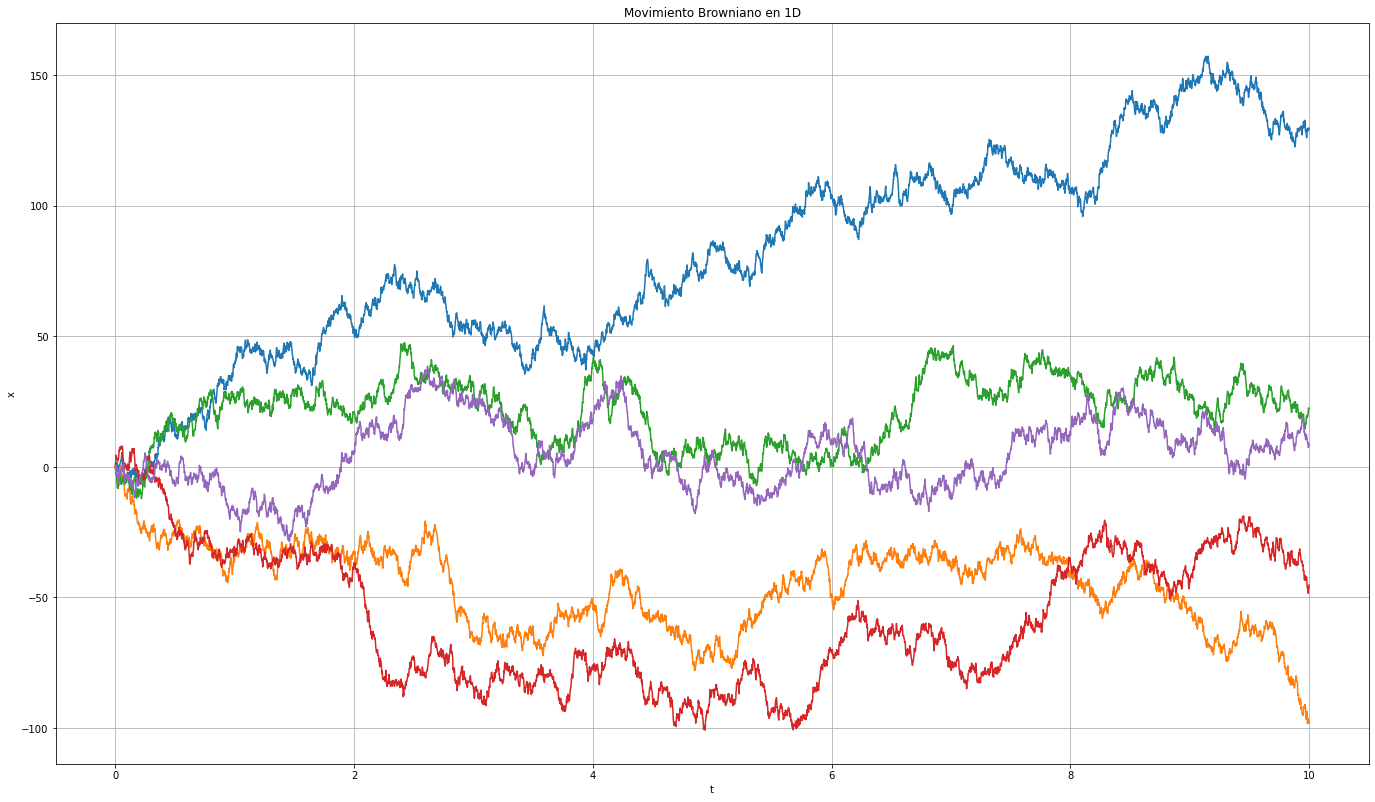

In [ ]:
def brownian(x0, n, dt, delta, out=None):

   #  n : The number of steps to take.
   #  dt : time step
   #  delta : speed of motion
   #  out :If `out` is NOT None, it specifies the array in which to put the
   #      result.  If `out` is None, a new numpy array is created and returned.
    x0 = np.asarray(x0) #I.C
    r = norm.rvs(size=x0.shape + (n,), scale=dt**2+dt+delta) #generate n numbers for sample
    if out is None: #create out array
        out = np.empty(r.shape)
    np.cumsum(r, axis=-1, out=out) #cumulative sum for random variables
    out += np.expand_dims(x0, axis=-1)#initial condition.
    return out

def main():
    plt.rcParams["figure.figsize"] = (80,30)
    fig = plt.figure(1) #prepare plot
    ax1 = fig.add_subplot(231)
    
    delta = 1 # The Wiener process parameter.
    T = 10.0
    N = 5000# Number of steps.
    dt = T/N
    m = 5 # Number of lines
    x = np.empty((m,N+1))# Create an empty array to store the realizations.
    x[:, 0] =  0# Initial values of x.
    brownian(x[:,0], N, dt, delta, out=x[:,1:]) 

    t = np.linspace(0.0, T, N+1)
    for i in range(m):
        ax1.plot(t, x[i])

    ax1.set_title('Movimiento Browniano en 1D')
    ax1.set_xlabel('t')
    ax1.set_ylabel('x')
    ax1.grid(True)
    show()
    return
main()

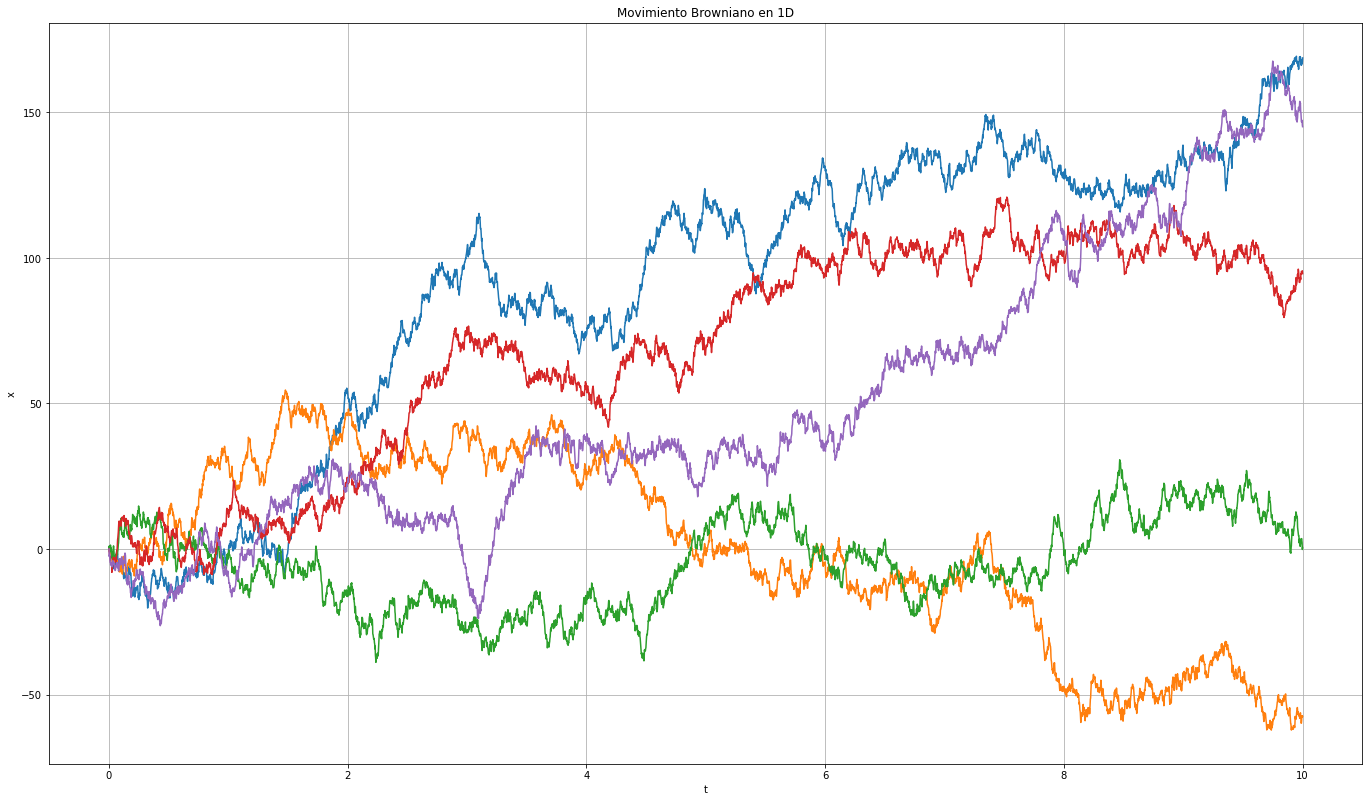

In [ ]:
plt.rcParams["figure.figsize"] = (80,30)
fig = plt.figure(1) #prepare plot
ax1 = fig.add_subplot(231)

delta = 1 # The Wiener process parameter.
T = 10.0
N = 5000# Number of steps.
dt = T/N
m = 5 # Number of lines
x = np.empty((m,N+1))# Create an empty array to store the realizations.
x[:, 0] =  0# Initial values of x.

brownian(x[:,0], N, dt, delta, out=x[:,1:]) 

t = np.linspace(0.0, T, N+1)
for i in range(m):
    ax1.plot(t, x[i])
ax1.set_title('Movimiento Browniano en 1D')
ax1.set_xlabel('t')
ax1.set_ylabel('x')
ax1.grid(True)

show()

In [ ]:
import numpy as np
from pylab import show
from math import sqrt
from scipy.stats import norm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D


def M_brownian(x0, n, dt, delta, out=None):

   #  n : El número de pasos a seguir
   #  dt : paso de tiempo
   #  delta : velocidad de movimiento
   #  out :Si `out` es NO None, especifica la matriz en la que hay que colocar el resultado
   #    Si `out` es None, se crea y devuelve un nuevo array de numpy.
    x0 = np.asarray(x0) # Conndicion Ini
    r = norm.rvs(size=x0.shape + (n,), scale=2*delta*sqrt(4*dt**2)) # generar n números para la muestra con la función
    if out is None: #crear una array de salida
        out = np.empty(r.shape)
    np.cumsum(r, axis=-1, out=out) #suma acumulativa para variables aleatorias
    out += np.expand_dims(x0, axis=-1)#Condición inicial
    return out

def main(par):
    plt.rcParams["figure.figsize"] = (80,30) #El tamaño de la imagen
    fig = plt.figure(1) # Se prepara el plot
    ax2 = fig.add_subplot(232)

    delta = 5 # El parámetro del proceso Wiener.
    T = 10.0
    N = 500 # Número de pasos.
    dt = T/N
    m = 5
    x = np.empty((m,N+1))# Crea un array vacío para almacenar las realizaciones.
    x[:, 0] =  10 # Valores iniciales de x.
    color = list(np.random.choice(range(256), size=3))
    for j in range(par):
        M_brownian(x[:,0], N, dt, delta, out=x[:,1:]) 
        ax2.plot(x[0],x[1], c = 'b')
        ax2.plot(x[0,-1], x[1,-1], 'ro') #Final 

    ax2.plot(x[0,-1], x[1,-1], 'ro', label = "Punto final") #Final 
    ax2.plot(x[0,0],x[1,0], 'go', label = "Punto de Inicio")
    ax2.set_title('Movimiento Browniano en 2D ')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.axis('equal')
    ax2.grid(True)
    plt.legend(loc="upper right")
    show()
    return

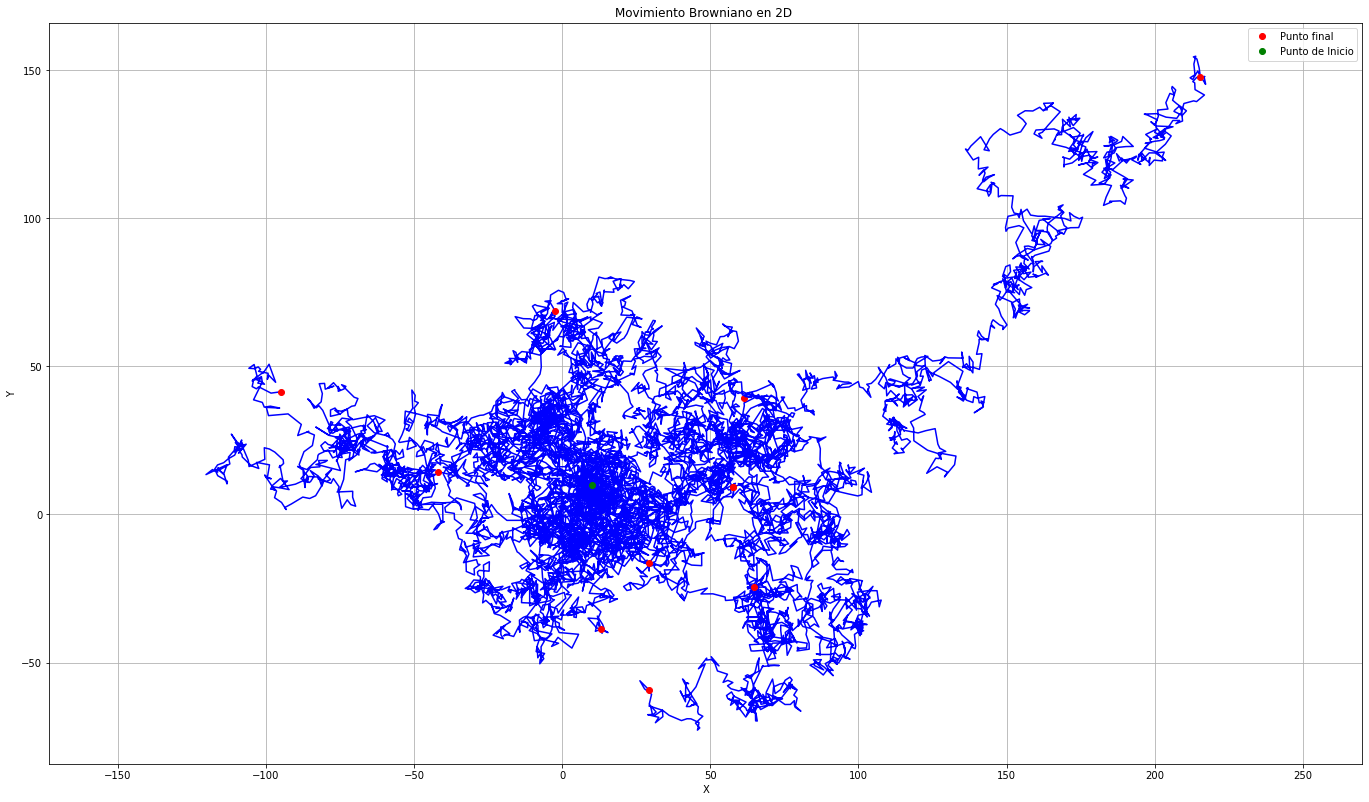

In [ ]:
import numpy as np
from pylab import show
from math import sqrt
from scipy.stats import norm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D


def M_brownian(x0, n, dt, delta, out=None):

   #  n : El número de pasos a seguir
   #  dt : paso de tiempo
   #  delta : velocidad de movimiento
   #  out :Si `out` es NO None, especifica la matriz en la que hay que colocar el resultado
   #    Si `out` es None, se crea y devuelve un nuevo array de numpy.
    x0 = np.asarray(x0) # Conndicion Ini
    r = norm.rvs(size=x0.shape + (n,), scale=2*delta*sqrt(4*dt**2)) # generar n números para la muestra con la función
    if out is None: #crear una array de salida
        out = np.empty(r.shape)
    np.cumsum(r, axis=-1, out=out) #suma acumulativa para variables aleatorias
    out += np.expand_dims(x0, axis=-1)#Condición inicial
    return out


plt.rcParams["figure.figsize"] = (80,30) #El tamaño de la imagen
fig = plt.figure(1) # Se prepara el plot
ax2 = fig.add_subplot(232)

par = 10
delta = 5 # El parámetro del proceso Wiener.
T = 100.0
N = 1000 # Número de pasos.
dt = T/N
m = 5
x = np.empty((m,N+1))# Crea un array vacío para almacenar las realizaciones.
x[:, 0] =  10 # Valores iniciales de x.
color = list(np.random.choice(range(256), size=3))
for j in range(par):
    a = M_brownian(x[:,0], N, dt, delta, out=x[:,1:]) 
    ax2.plot(x[0],x[1], c = 'b')
    ax2.plot(x[0,-1], x[1,-1], 'ro') #Final 

ax2.plot(x[0,-1], x[1,-1], 'ro', label = "Punto final") #Final 
ax2.plot(x[0,0],x[1,0], 'go', label = "Punto de Inicio")
ax2.set_title('Movimiento Browniano en 2D ')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.axis('equal')
ax2.grid(True)
plt.legend(loc="upper right")
show()

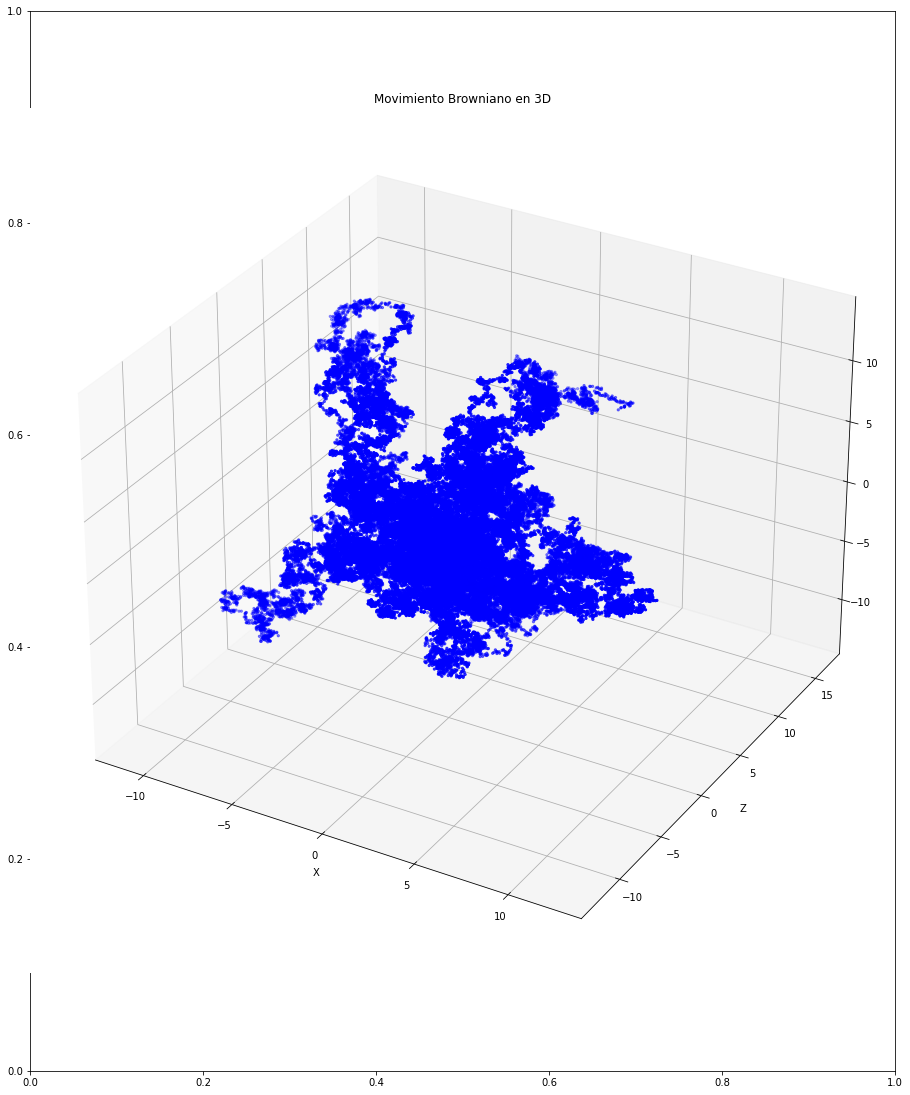

In [ ]:
import numpy as np
from pylab import show
from math import sqrt
from scipy.stats import norm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D


def M_brownian(x0, n, dt, delta, out=None):

   #  n : The number of steps to take.
   #  dt : time step
   #  delta : speed of motion
   #  out :If `out` is NOT None, it specifies the array in which to put the
   #      result.  If `out` is None, a new numpy array is created and returned.
    x0 = np.asarray(x0) #I.C
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt)) #generate n numbers for sample
    if out is None: #create out array
        out = np.empty(r.shape)
    np.cumsum(r, axis=-1, out=out) #cumulative sum for random variables
    out += np.expand_dims(x0, axis=-1)#initial condition.
    return out

def main():
    #plt.rcParams["figure.figsize"] = (80,30)   
    #fig = plt.figure(1) #prepare plot
    #ax = fig.add_subplot(2, 3, 3, projection='3d')

    fig, ax = plt.subplots(figsize=(15.5, 19.5))
    ax = fig.add_subplot(111, projection='3d')


    delta = 2 # The Wiener process parameter.
    T = 10.0
    N = 5000 # Number of steps.
    dt = T/N
    m = 5 # Number of lines
    x = np.empty((m,N+1)) # Create an empty array to store the realizations.
    x[:, 0] =  0 # Initial values of x.


    t = np.linspace(0.0, T, N+1)
    #Data for a three-dimensional line
    for i in range(15):
        a = M_brownian(x[:, 0], N, dt, delta, out=x[:,1:])
        ax.scatter(a[0], a[1], a[2], marker = ".", c= 'b')
        #plt.plot(a[0], a[1], a[2])

    ax.scatter(a[0,0], a[1,0],a[2,0], c = "g", marker="o")
    ax.set_title('Movimiento Browniano en 3D')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_ylabel('Z')
    ax.axis('auto')


    show()
    return
main()

 ### Establecemos condiciones para la animación.

In [ ]:
delta = 2 # The Wiener process parameter.
T = 10.0
N = 1000 # Number of steps.
dt = T/N
m = 5 # Number of lines
x = np.empty((m,N+1)) # Create an empty array to store the realizations.
x[:, 0] =  0 # Initial values of x.




In [ ]:
t = np.linspace(0.0, T, N)

In [ ]:
# Corremos 5 trayectorias para la animación
Lista_Tray = []

for i in range(5):
    a = 0
    a = M_brownian(x[:,0], N, dt, delta, out=x[:,1:])
    Lista_Tray.append(a)

In [ ]:
# Definimos las variables de las trayectorias
tr_1, tr_2, tr_3, tr_4, tr_5 = [],[],[],[],[]
tr_1, tr_2, tr_3, tr_4, tr_5 = Lista_Tray[0], Lista_Tray[1], Lista_Tray[2], Lista_Tray[3], Lista_Tray[4]

In [ ]:
# Comenzamos para la primera animación, extraemos los términos x, y & z.

tr_1x, tr_1y, tr_1z = tr_1[0], tr_1[1], tr_1[2]
tr_2x, tr_2y, tr_2z = tr_2[0], tr_2[1], tr_2[2]
tr_3x, tr_3y, tr_3z = tr_3[0], tr_3[1], tr_3[2]
tr_4x, tr_4y, tr_4z = tr_4[0], tr_4[1], tr_4[2]
tr_5x, tr_5y, tr_5z = tr_5[0], tr_5[1], tr_5[2]

In [ ]:
len(tr_1x)

1000

In [ ]:
#Inicializamos la Widegt para la animación
%matplotlib inline
%matplotlib notebook

<IPython.core.display.Javascript object>


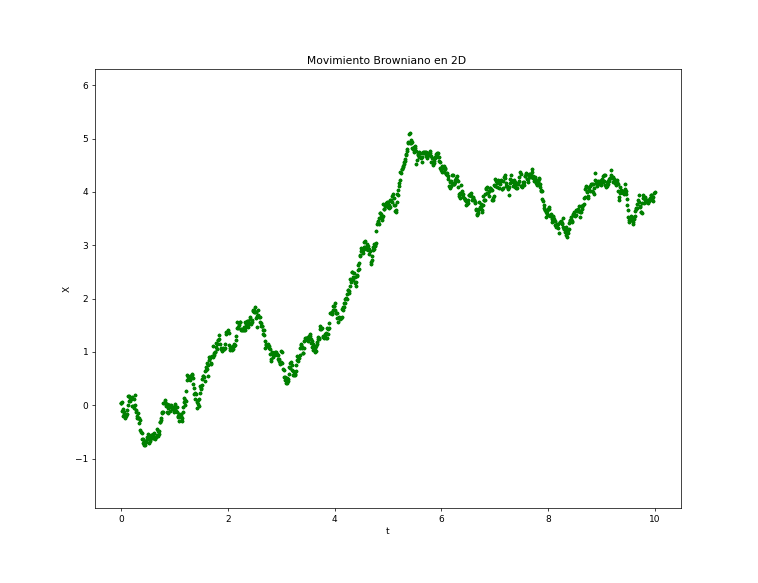

MovieWriter ffmpeg unavailable; using Pillow instead.


In [ ]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (13, 10)
def update_linechart(i):
    ax.plot(t[i],tr_1x[i], '.', c = 'g')

#ax.plot(x[0,-1], x[1,-1], 'ro', label = "Punto final") #Final 
#ax.plot(x[0,0],x[1,0], 'go', label = "Punto de Inicio")
ax.set_title('Movimiento Browniano en 2D ')
ax.set_xlabel('t')
ax.set_ylabel('X')
ax.axis('equal')
num_frames = len(t)
anim = animation.FuncAnimation(fig, update_linechart, frames = num_frames, interval = 1)
anim.save('MB_xvst.gif', fps=30)

In [ ]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (13, 10)
def update_linechart(i):
    ax.plot(tr_1x[i],tr_1y[i], 'o', c = 'b')

#ax.plot(x[0,-1], x[1,-1], 'ro', label = "Punto final") #Final 
#ax.plot(x[0,0],x[1,0], 'go', label = "Punto de Inicio")
ax.plot(tr_1x[-1], tr_1y[-1], 'ro', label = "Punto final") #Final 
ax.plot(tr_1x[0], tr_1y[0], 'go', label = "Punto de Inicio")
ax.set_title('Movimiento Browniano en 2D ')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.axis('equal')
num_frames = len(t)
anim = animation.FuncAnimation(fig, update_linechart, frames = num_frames, interval = 1)
anim.save('MB_xvsy.gif', fps=30)

<IPython.core.display.Javascript object>

MovieWriter ffmpeg unavailable; using Pillow instead.
